In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split        # To Partition the data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix     #Performance matrix

In [ ]:
data_income=pd.read_csv("/content/drive/MyDrive/NEW PANDAS/income(1).csv")

In [ ]:
data_income

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data=data_income.copy()

##EDA
1. Getting to know the data
2. Data preprocessing (missing values)
3. Cross tables & data visualization

In [ ]:
# Getting to know the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include=["O"])

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [ ]:
data["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [ ]:
print(np.unique(data["JobType"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [ ]:
print(np.unique(data["occupation"]))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/NEW PANDAS/income(1).csv",na_values=[" ?"])

In [ ]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
missing=data[data.isnull().any(axis=1)]

In [ ]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


Points To Note

Missing Value in JobType is = 1809
Missing Value in Occupation is =1816

There are 1809 rows where two specific columns i.e Occupatil & JobType have missing values

(1816-1809)=7--------You still have ocupation unfilled for these 7 rows.Because jobtype is never worked


Here it is very difficult to fill the missing values so here we are going to remove it.Also here we could not able to establish any relationship

In [ ]:
data2=data.dropna(axis=0)

In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
correlation=data2.corr()

<ipython-input-26-065ef5f84742>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data2.corr()


In [ ]:
correlation      # Relationship between independant variables   Near to 1 means strong relationship

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [ ]:
Gender=pd.crosstab(index=data2["gender"],columns="count",normalize=True)

In [ ]:
Gender      # Male Proportion is more


col_0,count
gender,
Female,0.324315
Male,0.675685


In [ ]:
gender_salstat= pd.crosstab(index=data2["gender"],columns=data2["SalStat"],margins=True,normalize="index")

In [ ]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


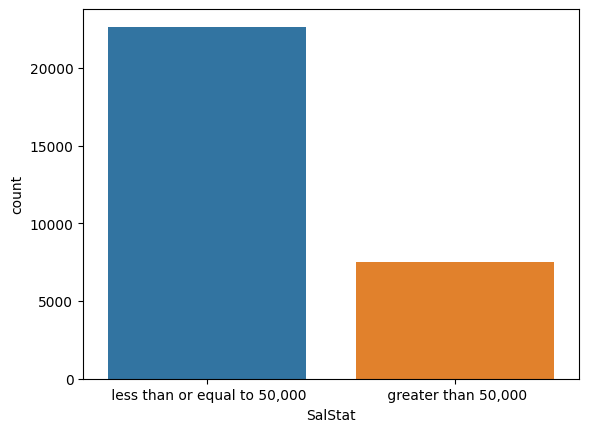

In [ ]:
salstat = sns.countplot(data=data2, x="SalStat")
plt.show()  # Display the plot

In [ ]:
data2.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [ ]:
print(np.unique(data2["SalStat"]))

[' greater than 50,000' ' less than or equal to 50,000']


People with age 20-45 are in high frequency

<ipython-input-35-7885365d35c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2["age"],bins=10,kde=False)


<Axes: xlabel='age'>

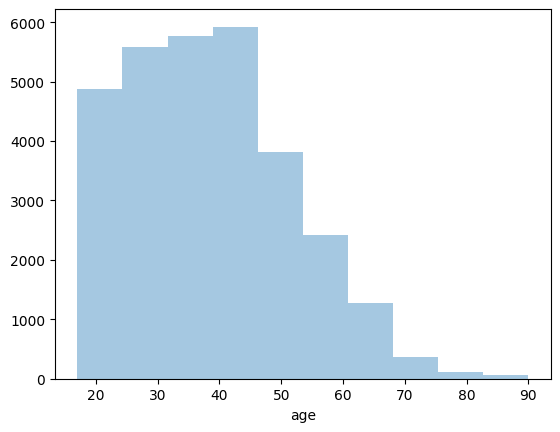

In [ ]:
sns.distplot(data2["age"],bins=10,kde=False)

In [ ]:
salstat=sns.countplot(data2["SalStat"])        # Frequency distribution of SalStat

ValueError: ignored

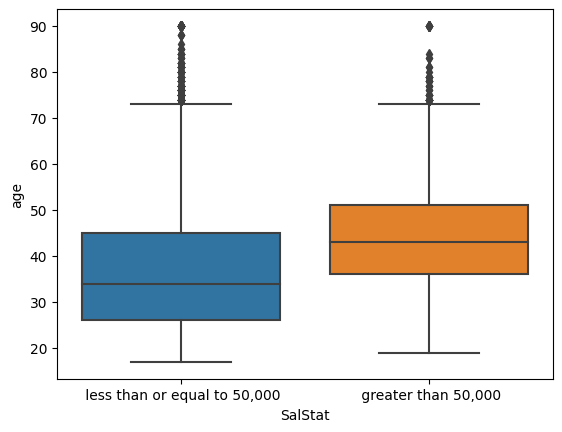

In [ ]:
sns.boxplot(x="SalStat", y="age", data=data2)
plt.show()  # Display the plot


In [ ]:
median_age_by_salstat = data2.groupby("SalStat")["age"].median()
print(median_age_by_salstat)

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64


<Axes: xlabel='SalStat', ylabel='count'>

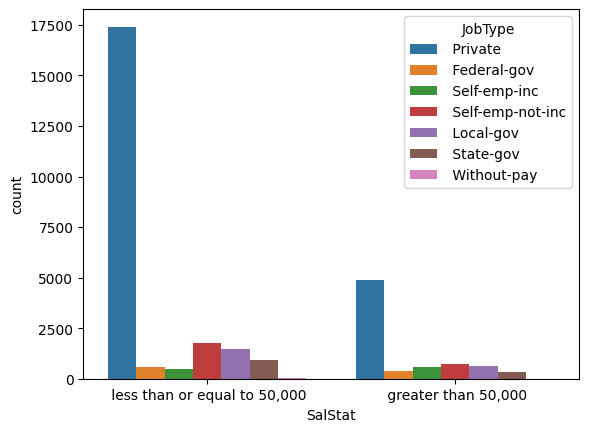

In [ ]:
sns.countplot(x="SalStat",data=data2,hue="JobType")


<Axes: xlabel='count', ylabel='JobType'>

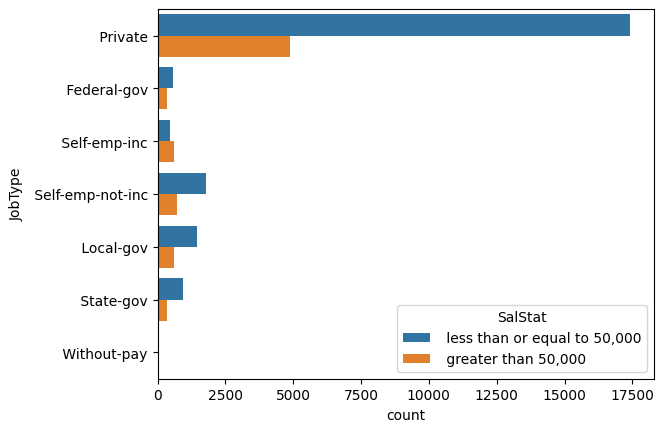

In [ ]:
sns.countplot(y="JobType",data=data2,hue="SalStat")


In [ ]:
df1=pd.crosstab(index=data2["JobType"],columns=data2["SalStat"])

In [ ]:
df1

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,365,578
Local-gov,609,1458
Private,4876,17410
Self-emp-inc,600,474
Self-emp-not-inc,714,1785
State-gov,344,935
Without-pay,0,14


In [ ]:
df2=pd.crosstab(index=data2["JobType"],columns=data2["SalStat"],normalize="index")

In [ ]:
df2

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000


From the above table it is visible that 56% self employed people earn more than 50000 USD per year.

Hence an impotant variable in avoding the missuse of sunsidies

<Axes: xlabel='count', ylabel='EdType'>

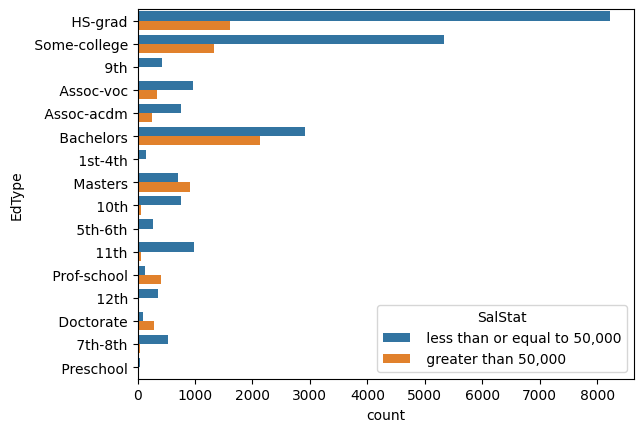

In [ ]:
sns.countplot(y="EdType",data=data2,hue="SalStat")

In [ ]:
df4=pd.crosstab(index=data2["EdType"],columns=data2["SalStat"],normalize="index")

In [ ]:
df4

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


<Axes: xlabel='count', ylabel='occupation'>

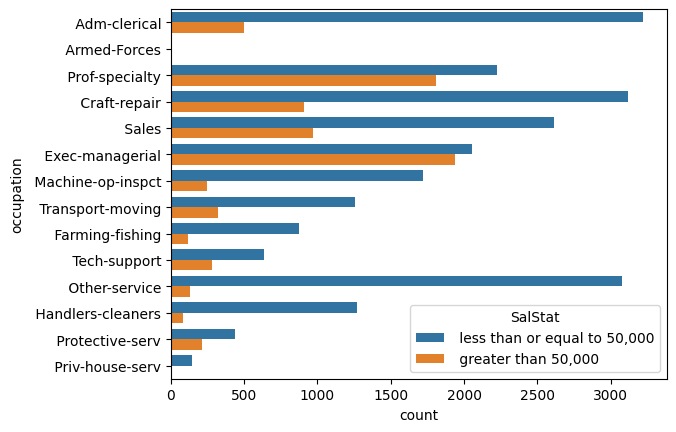

In [ ]:
sns.countplot(y="occupation",data=data2,hue="SalStat")

In [ ]:
df5=pd.crosstab(index=data2["occupation"],columns=data2["SalStat"],normalize="index")

In [ ]:
df5

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


Those who makes more than 50000 USD per year are more likely to work as managers & Prof-specialty

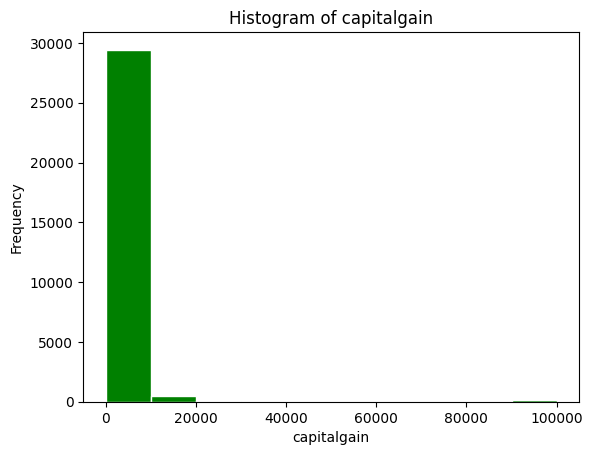

In [ ]:
plt.hist(data2["capitalgain"],color="green",edgecolor="white")
plt.title("Histogram of capitalgain")
plt.xlabel("capitalgain")
plt.ylabel("Frequency")
plt.show()

Capital gain ranging from 0-100000,
92% (27611) of capital gain is 0
only 8% people gained something by selling their assets

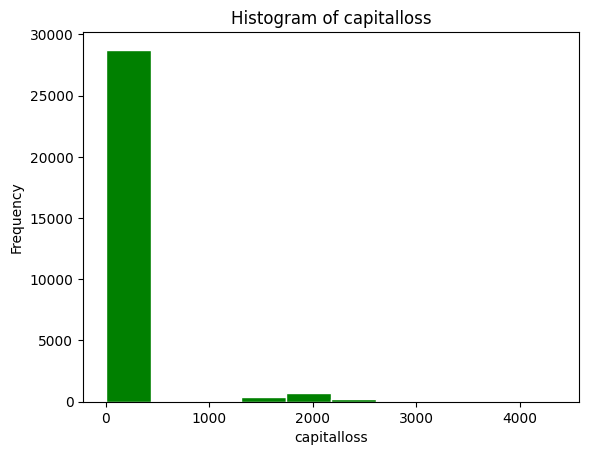

In [ ]:
plt.hist(data2["capitalloss"],color="green",edgecolor="white")
plt.title("Histogram of capitalloss")
plt.xlabel("capitalloss")
plt.ylabel("Frequency")
plt.show()

In [ ]:
95% of capitalloss is zero i.e (28721)

SyntaxError: ignored

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

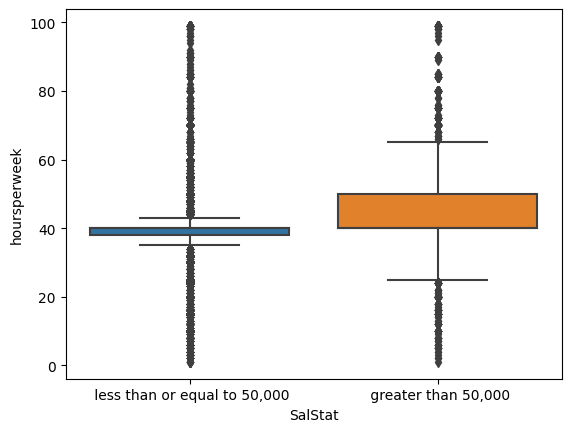

In [ ]:
sns.boxplot(x=data2["SalStat"],y=data2["hoursperweek"])

From the plot it is clearly visible that those who make more than 50000 USD per year are more likely to spend 40-50hrs per week.this variable can contribute in calssifying the individuals salary status since there is association between salary status & hrs per week.

In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,NaN
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,NaN
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,NaN
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,NaN
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,NaN
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,NaN
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,NaN


## LOGISTIC REGRESSION

Reindexing salary status name to 0 to 1

In [ ]:
data2["SalStat"] = data2["SalStat"].str.strip().replace({"less than or equal to 50,000": 0, "greater than 50,000": 1})

<ipython-input-60-38f400708337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["SalStat"] = data2["SalStat"].str.strip().replace({"less than or equal to 50,000": 0, "greater than 50,000": 1})


In [ ]:
print(data2["SalStat"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 30162, dtype: float64


In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,NaN
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,NaN
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,NaN
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,NaN
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,NaN
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,NaN
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
data2.dtypes

age                int64
JobType           object
EdType            object
maritalstatus     object
occupation        object
relationship      object
race              object
gender            object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
nativecountry     object
SalStat          float64
dtype: object